##### <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 8 submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">Yixuan Jin UTEID:yj6225</p>
## <p style="text-align: center;">Ankit Gupta UTEID:ag76585</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You will predict the type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import time
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)

### Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.

This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
    4.  For a given K, filter the dataset to extract the most popular K Primary Types and report what percentage of the total dataset this amounts to. Lets call this percentage, F. Now, find what fraction of this filtered data can be supported in your analysis on your local machine. Lets call this P. For example, of the approximately 7 million entries, say for K=3, we find that the top three types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine can handle all 3.5 million entries in you ML analysis. Say you find out that you can only handle 60% of this, which means your working dataset will be 2.1 million entries.  
5.  For each K=2,3,4,5 (and associated percentage 'P'), you should train a model and report the accuracy. (Refer to other tasks)

Hint: Split the data into training and testing in the ratio of 80:20.

In [37]:
start_reading_time = time.time()
df = pd.read_csv('crimes.csv')
end_reading_time = time.time()
print('Time taken to read data on laptop in seconds: ' + str(round(end_reading_time-start_reading_time,2)))
df.head()

Time taken to read data on laptop in seconds: 26.29


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## Histogram of variable 'Primary Type'

<AxesSubplot:>

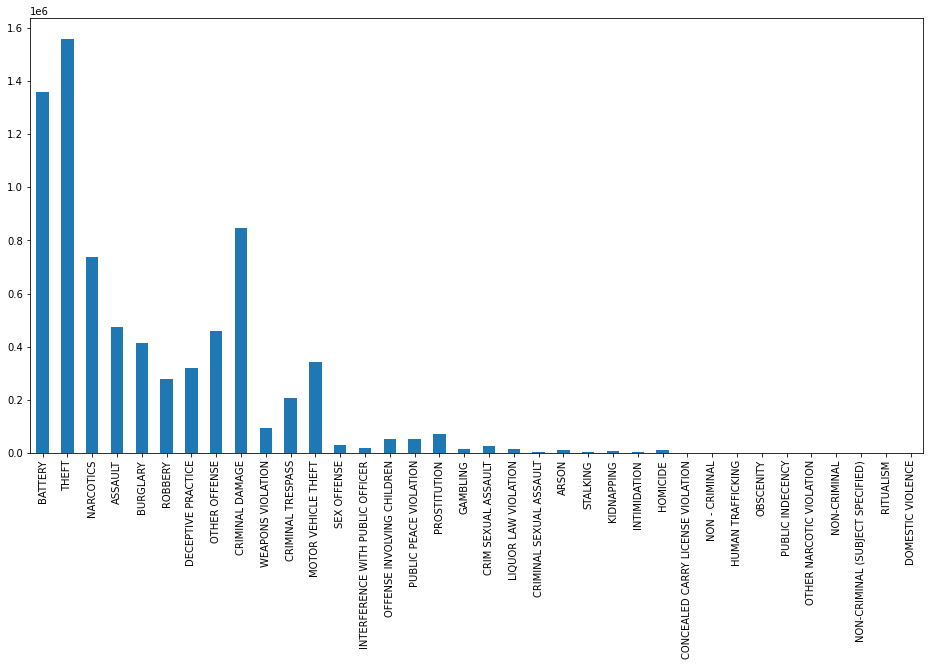

In [5]:
df['Primary Type'].value_counts(sort=False).plot(kind='bar')

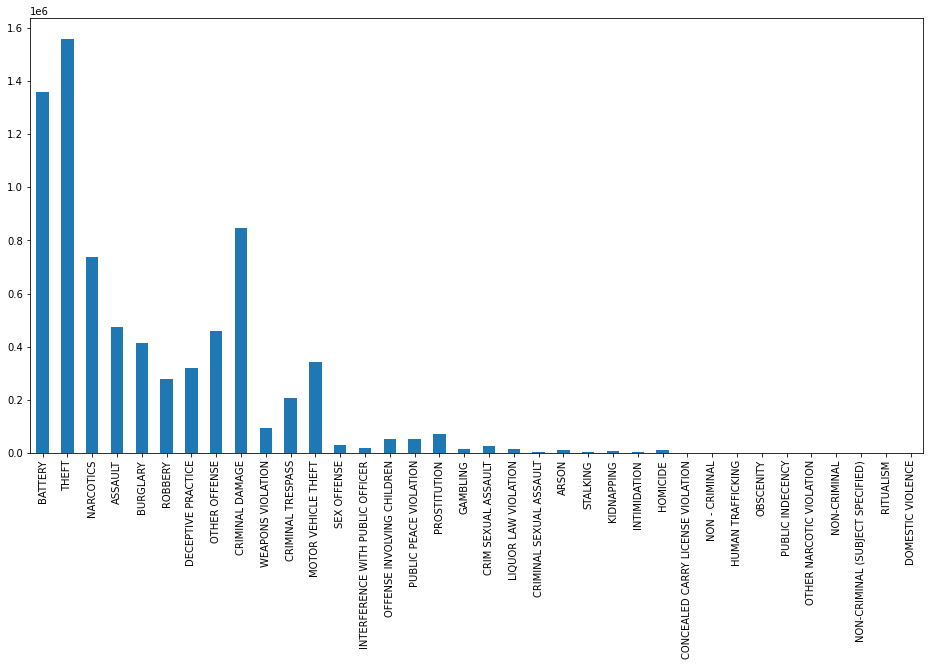

In [50]:
from IPython.display import Image
Image(filename=r'histogram_unsorted.png')

## Histogram of variable 'Primary Type' decreasing order

<AxesSubplot:>

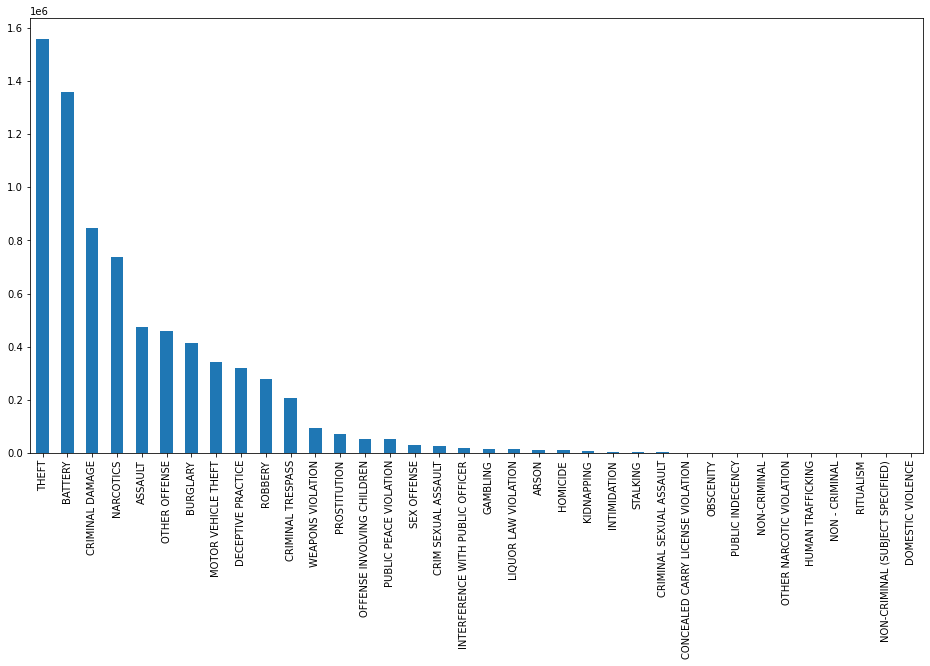

In [6]:
df['Primary Type'].value_counts().plot(kind='bar')

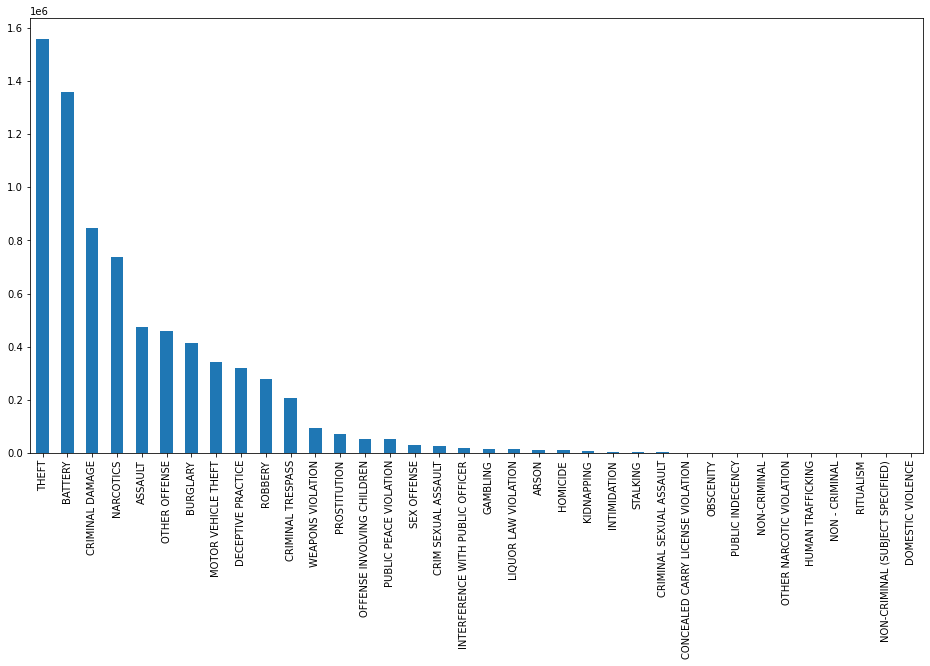

In [51]:
from IPython.display import Image
Image(filename=r'histogram_sorted.png')

In [9]:
#List of Primary Type sorted by the count value
primary_type_dict = dict(df['Primary Type'].value_counts())
print(primary_type_dict)
primary_type_list = list(primary_type_dict.keys())

{'THEFT': 1559240, 'BATTERY': 1359400, 'CRIMINAL DAMAGE': 845012, 'NARCOTICS': 739257, 'ASSAULT': 474939, 'OTHER OFFENSE': 460800, 'BURGLARY': 412353, 'MOTOR VEHICLE THEFT': 341649, 'DECEPTIVE PRACTICE': 318101, 'ROBBERY': 278111, 'CRIMINAL TRESPASS': 207674, 'WEAPONS VIOLATION': 92998, 'PROSTITUTION': 69444, 'OFFENSE INVOLVING CHILDREN': 52148, 'PUBLIC PEACE VIOLATION': 51220, 'SEX OFFENSE': 28610, 'CRIM SEXUAL ASSAULT': 27839, 'INTERFERENCE WITH PUBLIC OFFICER': 17735, 'GAMBLING': 14603, 'LIQUOR LAW VIOLATION': 14569, 'ARSON': 12554, 'HOMICIDE': 11456, 'KIDNAPPING': 7047, 'INTIMIDATION': 4365, 'STALKING': 4091, 'CRIMINAL SEXUAL ASSAULT': 3850, 'CONCEALED CARRY LICENSE VIOLATION': 806, 'OBSCENITY': 747, 'PUBLIC INDECENCY': 187, 'NON-CRIMINAL': 175, 'OTHER NARCOTIC VIOLATION': 140, 'HUMAN TRAFFICKING': 76, 'NON - CRIMINAL': 38, 'RITUALISM': 24, 'NON-CRIMINAL (SUBJECT SPECIFIED)': 9, 'DOMESTIC VIOLENCE': 1}


### K=2

In [52]:
k=2
df_k = df[df['Primary Type'].isin(primary_type_list[:k])]
#df_k.head()

In [53]:
F = df_k.shape[0]/df.shape[0]*100
print(f'When K={k} Primary Types are:{primary_type_list[:k]} represents: {round(F, 2)}% of the total dataset')

When K=2 Primary Types are:['THEFT', 'BATTERY'] represents: 39.38% of the total dataset


In [54]:
k = 2
p = [0.25, 0.5, 0.75, 1.00]
for i in p:
    #Randomly select p percentage of sample 
    df_k_percent = df_k.sample(frac=i)
    #Apply label encoding method to the sample we selcted
    df_k_percent = df_k_percent.apply(LabelEncoder().fit_transform)
    
    #Separate features and labels
    #X features
    X = df_k_percent.drop(columns=['Primary Type'])
    #y label
    y = df_k_percent['Primary Type']
    
    #Train and test split 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #Fit X_train and y_train into Random Forest model
    rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
    start_time = time.time()
    rf_model.fit(X_train, y_train)

    #Get test predictions
    y_pred = rf_model.predict(X_test)
    end_time = time.time()
    # Return balanced accuracy score for classes
    print(f'Model process time when K={k} for {i * 100}% of the data is: {round(end_time - start_time, 2)}s')
    print(f'When K={k} accuracy score for {i * 100}% of the data is: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'When K={k} precision score for {i * 100}% of the data is: {metrics.precision_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} recall score for {i * 100}% of the data is: {metrics.recall_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} F1 score for {i * 100}% of the data is: {metrics.f1_score(y_test, y_pred, average="micro")}')

Model process time when K=2 for 25.0% of the data is: 25.04s
When K=2 accuracy score for 25.0% of the data is: 1.0
When K=2 precision score for 25.0% of the data is: 1.0
When K=2 recall score for 25.0% of the data is: 1.0
When K=2 F1 score for 25.0% of the data is: 1.0
Model process time when K=2 for 50.0% of the data is: 56.22s
When K=2 accuracy score for 50.0% of the data is: 1.0
When K=2 precision score for 50.0% of the data is: 1.0
When K=2 recall score for 50.0% of the data is: 1.0
When K=2 F1 score for 50.0% of the data is: 1.0
Model process time when K=2 for 75.0% of the data is: 86.93s
When K=2 accuracy score for 75.0% of the data is: 1.0
When K=2 precision score for 75.0% of the data is: 1.0
When K=2 recall score for 75.0% of the data is: 1.0
When K=2 F1 score for 75.0% of the data is: 1.0
Model process time when K=2 for 100.0% of the data is: 115.17s
When K=2 accuracy score for 100.0% of the data is: 1.0
When K=2 precision score for 100.0% of the data is: 1.0
When K=2 recall 

### K=3

In [55]:
k=3
df_k = df[df['Primary Type'].isin(primary_type_list[:k])]
#df_k.head()
F = df_k.shape[0]/df.shape[0]*100
print(f'When K={k} Primary Types are:{primary_type_list[:k]} represents: {round(F, 2)}% of the total dataset')

When K=3 Primary Types are:['THEFT', 'BATTERY', 'CRIMINAL DAMAGE'] represents: 50.78% of the total dataset


In [56]:
k = 3
p = [0.25, 0.5, 0.75, 1.00]
for i in p:
    #Randomly select p percentage of sample 
    df_k_percent = df_k.sample(frac=i)
    #Apply label encoding method to the sample we selcted
    df_k_percent = df_k_percent.apply(LabelEncoder().fit_transform)
    
    #Separate features and labels
    #X features
    X = df_k_percent.drop(columns=['Primary Type'])
    #y label
    y = df_k_percent['Primary Type']
    
    #Train and test split 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #Fit X_train and y_train into Random Forest model
    rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
    start_time = time.time()
    rf_model.fit(X_train, y_train)

    #Get test predictions
    y_pred = rf_model.predict(X_test)
    end_time = time.time()
    # Return balanced accuracy score for classes
    print(f'Model process time when K={k} for {i * 100}% of the data is: {round(end_time - start_time, 2)}s')
    print(f'When K={k} accuracy score for {i * 100}% of the data is: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'When K={k} precision score for {i * 100}% of the data is: {metrics.precision_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} recall score for {i * 100}% of the data is: {metrics.recall_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} F1 score for {i * 100}% of the data is: {metrics.f1_score(y_test, y_pred, average="micro")}')

Model process time when K=3 for 25.0% of the data is: 41.7s
When K=3 accuracy score for 25.0% of the data is: 1.0
When K=3 precision score for 25.0% of the data is: 1.0
When K=3 recall score for 25.0% of the data is: 1.0
When K=3 F1 score for 25.0% of the data is: 1.0
Model process time when K=3 for 50.0% of the data is: 248.13s
When K=3 accuracy score for 50.0% of the data is: 1.0
When K=3 precision score for 50.0% of the data is: 1.0
When K=3 recall score for 50.0% of the data is: 1.0
When K=3 F1 score for 50.0% of the data is: 1.0
Model process time when K=3 for 75.0% of the data is: 236.23s
When K=3 accuracy score for 75.0% of the data is: 1.0
When K=3 precision score for 75.0% of the data is: 1.0
When K=3 recall score for 75.0% of the data is: 1.0
When K=3 F1 score for 75.0% of the data is: 1.0
Model process time when K=3 for 100.0% of the data is: 214.68s
When K=3 accuracy score for 100.0% of the data is: 1.0
When K=3 precision score for 100.0% of the data is: 1.0
When K=3 recall

### K=4

In [59]:
k=4
df_k = df[df['Primary Type'].isin(primary_type_list[:k])]
#df_k.head()
F = df_k.shape[0]/df.shape[0]*100
print(f'When K={k} Primary Types are:{primary_type_list[:k]} represents: {round(F, 2)}% of the total dataset')

When K=4 Primary Types are:['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS'] represents: 60.76% of the total dataset


In [60]:
k = 4
p = [0.25, 0.5, 0.75, 1.00]
for i in p:
    #Randomly select p percentage of sample 
    df_k_percent = df_k.sample(frac=i)
    #Apply label encoding method to the sample we selcted
    df_k_percent = df_k_percent.apply(LabelEncoder().fit_transform)
    
    #Separate features and labels
    #X features
    X = df_k_percent.drop(columns=['Primary Type'])
    #y label
    y = df_k_percent['Primary Type']
    
    #Train and test split 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #Fit X_train and y_train into Random Forest model
    rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
    start_time = time.time()
    rf_model.fit(X_train, y_train)

    #Get test predictions
    y_pred = rf_model.predict(X_test)
    end_time = time.time()
    # Return balanced accuracy score for classes
    print(f'Model process time when K={k} for {i * 100}% of the data is: {round(end_time - start_time, 2)}s')
    print(f'When K={k} accuracy score for {i * 100}% of the data is: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'When K={k} precision score for {i * 100}% of the data is: {metrics.precision_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} recall score for {i * 100}% of the data is: {metrics.recall_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} F1 score for {i * 100}% of the data is: {metrics.f1_score(y_test, y_pred, average="micro")}')

Model process time when K=4 for 25.0% of the data is: 57.45s
When K=4 accuracy score for 25.0% of the data is: 1.0
When K=4 precision score for 25.0% of the data is: 1.0
When K=4 recall score for 25.0% of the data is: 1.0
When K=4 F1 score for 25.0% of the data is: 1.0
Model process time when K=4 for 50.0% of the data is: 133.57s
When K=4 accuracy score for 50.0% of the data is: 1.0
When K=4 precision score for 50.0% of the data is: 1.0
When K=4 recall score for 50.0% of the data is: 1.0
When K=4 F1 score for 50.0% of the data is: 1.0
Model process time when K=4 for 75.0% of the data is: 212.68s
When K=4 accuracy score for 75.0% of the data is: 1.0
When K=4 precision score for 75.0% of the data is: 1.0
When K=4 recall score for 75.0% of the data is: 1.0
When K=4 F1 score for 75.0% of the data is: 1.0
Model process time when K=4 for 100.0% of the data is: 388.43s
When K=4 accuracy score for 100.0% of the data is: 1.0
When K=4 precision score for 100.0% of the data is: 1.0
When K=4 recal

### K=5

In [61]:
k=5
df_k = df[df['Primary Type'].isin(primary_type_list[:k])]
#df_k.head()
F = df_k.shape[0]/df.shape[0]*100
print(f'When K={k} Primary Types are:{primary_type_list[:k]} represents: {round(F, 2)}% of the total dataset')

When K=5 Primary Types are:['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'] represents: 67.17% of the total dataset


In [62]:
k = 5
p = [0.25, 0.5, 0.75, 1.00]
for i in p:
    #Randomly select p percentage of sample 
    df_k_percent = df_k.sample(frac=i)
    #Apply label encoding method to the sample we selcted
    df_k_percent = df_k_percent.apply(LabelEncoder().fit_transform)
    
    #Separate features and labels
    #X features
    X = df_k_percent.drop(columns=['Primary Type'])
    #y label
    y = df_k_percent['Primary Type']
    
    #Train and test split 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #Fit X_train and y_train into Random Forest model
    rf_model = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
    start_time = time.time()
    rf_model.fit(X_train, y_train)

    #Get test predictions
    y_pred = rf_model.predict(X_test)
    end_time = time.time()
    # Return balanced accuracy score for classes
    print(f'Model process time when K={k} for {i * 100}% of the data is: {round(end_time - start_time, 2)}s')
    print(f'When K={k} accuracy score for {i * 100}% of the data is: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'When K={k} precision score for {i * 100}% of the data is: {metrics.precision_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} recall score for {i * 100}% of the data is: {metrics.recall_score(y_test, y_pred, average="micro")}')
    print(f'When K={k} F1 score for {i * 100}% of the data is: {metrics.f1_score(y_test, y_pred, average="micro")}')

Model process time when K=5 for 25.0% of the data is: 81.45s
When K=5 accuracy score for 25.0% of the data is: 1.0
When K=5 precision score for 25.0% of the data is: 1.0
When K=5 recall score for 25.0% of the data is: 1.0
When K=5 F1 score for 25.0% of the data is: 1.0
Model process time when K=5 for 50.0% of the data is: 750.04s
When K=5 accuracy score for 50.0% of the data is: 1.0
When K=5 precision score for 50.0% of the data is: 1.0
When K=5 recall score for 50.0% of the data is: 1.0
When K=5 F1 score for 50.0% of the data is: 1.0
Model process time when K=5 for 75.0% of the data is: 297.71s
When K=5 accuracy score for 75.0% of the data is: 1.0
When K=5 precision score for 75.0% of the data is: 1.0
When K=5 recall score for 75.0% of the data is: 1.0
When K=5 F1 score for 75.0% of the data is: 1.0
Model process time when K=5 for 100.0% of the data is: 424.57s
When K=5 accuracy score for 100.0% of the data is: 1.0
When K=5 precision score for 100.0% of the data is: 1.0
When K=5 recal

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [22]:
df_encode = df.apply(LabelEncoder().fit_transform)
df_encode.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5891685,5887936,2100728,35602,52,2,208,158,0,1,...,11,61,10,42740,56682,14,432,367908,475604,368396
1,5891686,5887927,2092221,7904,100,34,364,68,0,0,...,28,25,7,16552,85138,14,432,554251,75799,554978
2,6845956,6843885,2066928,54584,90,34,356,158,0,1,...,7,44,7,78851,130047,17,1143,878787,878213,880010
3,5891687,5887916,2101041,30565,279,19,380,181,1,0,...,34,21,20,29703,100649,14,432,704160,237463,705144
4,5891688,5887925,2100709,427,80,1,444,17,0,1,...,27,25,9,19381,80365,14,432,509419,103971,510065


# Task 3 - Build the model

Once the features are converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [23]:
#We use the entire K class (entire primary type) 
#Separate features and labels
#X features
X2 = df_encode.drop(columns=['Primary Type'])
#y label
y2 = df_encode['Primary Type']

In [24]:
#Train and test split 80:20 ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [25]:
#Fit X_train and y_train into Random Forest model
rf_model_2 = RandomForestClassifier(n_estimators = 300, n_jobs = -1)
start_time = time.time()
rf_model_2.fit(X_train2, y_train2)

#Get test predictions
y_pred2 = rf_model_2.predict(X_test2)
end_time = time.time()
# Return balanced accuracy score for classes
print(f'Model process time for final model is: {round(end_time - start_time, 2)}s')
print(f'Accuracy score for final model is: {metrics.accuracy_score(y_test2, y_pred2)}')

Model process time for final model is: 1678.44s
Accuracy score for final model is: 0.9998137970955046


In [26]:
print(f'Final model precision: {metrics.precision_score(y_test2, y_pred2, average="micro")}')
print(f'Final model recall: {metrics.recall_score(y_test2, y_pred2, average="micro")}')
print(f'Final model F1 score: {metrics.f1_score(y_test2, y_pred2, average="micro")}')

Final model precision: 0.9998137970955046
Final model recall: 0.9998137970955046
Final model F1 score: 0.9998137970955046


# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

In [63]:
from IPython.display import HTML, display
    
data = [["Activity","Time taken (seconds) on Laptop", "Time taken (seconds) on Google Collab"],
        ["Reading Data","26.29","44.54"],
        ["Model Training (K=2, P=25)","25.04","165.05"],
        ["Model Training (K=2, P=50)","56.22","393.17"],
        ["Model Training (K=2, P=75)","86.93","619.1"],
        ["Model Training (K=2, P=100)","115.17","810.22"],
        ["Model Training (K=3, P=25)","41.7", "289.08"],
        ["Model Training (K=3, P=50)","248.13", "557.4"],
        ["Model Training (K=3, P=75)","236.23","825.35"],
        ["Model Training (K=3, P=100)","214.68","1355.61"],
        ["Model Training (K=4, P=25)","57.45","361.44"],
        ["Model Training (K=4, P=50)","133.57","855.92"],
        ["Model Training (K=4, P=75)","212.68","1290.7"],
        ["Model Training (K=4, P=100)","388.43","1872.32"],
        ["Model Training (K=5, P=25)","81.45","491.66"],
        ["Model Training (K=5, P=50)","750.04","1194.61"],
        ["Model Training (K=5, P=75)","297.71","1986.44"],
        ["Model Training (K=5, P=100)","424.57","Too much time"],
        ["Model Training (K=All, P=100)","1678.44","Too much time"],
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Activity,Time taken (seconds) on Laptop,Time taken (seconds) on Google Collab
Reading Data,26.29,44.54
"Model Training (K=2, P=25)",25.04,165.05
"Model Training (K=2, P=50)",56.22,393.17
"Model Training (K=2, P=75)",86.93,619.1
"Model Training (K=2, P=100)",115.17,810.22
"Model Training (K=3, P=25)",41.7,289.08
"Model Training (K=3, P=50)",248.13,557.4
"Model Training (K=3, P=75)",236.23,825.35
"Model Training (K=3, P=100)",214.68,1355.61
"Model Training (K=4, P=25)",57.45,361.44


In [48]:
# OBSERVATION
# Google Collab was much slower than our laptop. We were unable to use AWS because of the issue in account creation
# without the invite

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [33]:
from sklearn.model_selection import cross_val_score
from numpy import mean

df_task5 = df.apply(LabelEncoder().fit_transform)
df_task5 = df_task5[['Primary Type','IUCR','Arrest','Domestic','Beat','District','Community Area','FBI Code', 'Ward']]
X = df_task5.iloc[:, 1:9].values
y = df_task5.iloc[:,0].values

start_cv_time = time.time()
model = RandomForestClassifier(max_depth=5, random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
end_cv_time = time.time()
print('Time taken to run K-fold CV on laptop in seconds: ' + str(round(end_cv_time-start_cv_time,2)))
print('Accuracy: %.3f' % (mean(scores)))

/Users/ankitgupta/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Time taken to run K-fold CV on laptop in seconds: 772.31
Accuracy: 0.892


In [47]:
from IPython.display import HTML, display
    
data = [["Activity","Time taken (seconds) on Laptop", "Time taken (seconds) on Google Collab"],
        ["K-Fold","772.31","Too much time"],
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Activity,Time taken (seconds) on Laptop,Time taken (seconds) on Google Collab
K-Fold,772.31,Too much time
